 # Vorschlag mögliche "Musterlösung"

## Schritt 1: Fragestellung

Fragestellung für diesen Datensatz ist, ob man anhand von bestimmten Eigenschaften erkennen kann, ob jemand einen Kredit erhält.

In diesem Datensatz sind bewußt fehlerhafte Daten eingebaut, damit wir uns auch das Thema Data Engineering ansehen.

Folgende Aufgaben wollen wir uns zusätzlich im Detail ansehen:

* A0: Einlesen der Daten mit vorgegebenen Spaltennamen ["Loan", "Geschlecht", "Verheiratet", "Nutzungsintensität TikTok", "Bildung", "Selbstständig", "Einkommen", "Darlehenshöhe", "Darlehensdauer (Monate)", "Darlehenshistori (ja/nein)", "Entscheidung Kreditvergabe", "Lage des Objektes"]
* A1. Data Engineering und Cleaning
* A2. Feature Engineering: Erstellen neue Spalte "Darlehenshöhe in Klassen" in 4 Klassen
* A3: Plotten Zusammenhang "Darlehenshöhe" und "Kreditvergabe" via PygWalker und Matplotlib
* A4: Löschen Spalte "Darlehenshöhe in Klassen"
* A5: Outlier Detection (und Deletion)
* A6: Feature Scaling

## Schritt 2: Daten einlesen

In [4]:
import pandas as pd   # Importieren Standard-Library für das Bearbeiten und Laden von Daten ("Data Engineering").
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns   # verschönert Matplotlib-Graphiken
import numpy as np # Standard-Library für Rechnen

Im Datensatz, den wir für diese Aufgabe nehmen, sind bewußt fehlerhafte Daten eingebaut, damit wir uns auch das Thema Data Engineering ansehen.

Einen Datensatz ohne diese Fehler finden Sie unter:

In [5]:
#loan_df_new = pd.read_csv("https://raw.githubusercontent.com/JensKohl/Lecture-Technical_Applications_Data_Management-Slides_and_Notebooks/main/Datasets/Loan_Data.csv")

Im weiteren nehmen wir aber den "fehlerhaften" Datensatz. Falls Sie den obigen verwenden wollen, löschen Sie die Raute im obigen Block und springen dann direkt weiter bis TODO

In [6]:
from google.colab import files
files.upload(); # Hinweis: wenn Sie nach dem Befehl ein ; verwenden, erfolgt keine Bildschirmausgabe...probieren Sie mal mit oder ohne ; aus!

Saving Datensatz_Data Science Übung mit Fehlern.csv to Datensatz_Data Science Übung mit Fehlern (1).csv


In [7]:
loan_df = pd.read_csv("Datensatz_Data Science Übung mit Fehlern.csv")
loan_df

,LP001002;Male;No;0;Graduate;No;5849;;360;1;Y;Urban
0,LP001003;Male;Yes;1;Graduate;No;4583;128;360;1...
1,LP001005;Male;Yes;0;Graduate;Yes;3000;66;360;1...
2,LP001006;Male;Yes;0;Not Graduate;No;2583;120;3...
3,LP001008;Male;No;Unnötig ;Graduate;No;6000;141...
4,LP001011;Male;Yes;2;Graduate;Yes;5417;267;360;...
...,...
608,LP002978;Female;No;;Graduate;No;2900;71;360;1;...
609,LP002979;Male;Yes;;Graduate;No;4106;40;180;1;Y...
610,LP002983;Male;Yes;;Graduate;No;8072;253;360;1;...
611,LP002984;Male;Yes;;Graduate;No;7583;187;360;1;...


Wenn wir den Datensatz so einlesen, sehen wir, daß keine Aufteilung in Spalten erfolgt. Wir sehen in Zeile 0 die einzelnen Einträge getrennt von einem ;

In CSV-Dateien werden die Einträge meist per Kommata getrennt, manchmal aber auch per Semikolon- wie in diesem Fall. Das müssen wir beim Einlesen berücksichtigen...also lesen wir erneut ein

In [8]:
loan_df = pd.read_csv("Datensatz_Data Science Übung mit Fehlern.csv", sep=";")
loan_df

,LP001002,Male,No,0,Graduate,No.1,5849,Unnamed: 7,360,1,Y,Urban
0,LP001003,Male,Yes,1,Graduate,No,4583,128,360.0,1.0,N,Rural
1,LP001005,Male,Yes,0,Graduate,Yes,3000,66,360.0,1.0,Y,Urban
2,LP001006,Male,Yes,0,Not Graduate,No,2583,120,360.0,1.0,Y,Urban
3,LP001008,Male,No,Unnötig,Graduate,No,6000,141,360.0,0.0,Y,Urban
4,LP001011,Male,Yes,2,Graduate,Yes,5417,267,360.0,1.0,Y,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,NaN,Graduate,No,2900,71,360.0,1.0,Y,Rural
609,LP002979,Male,Yes,NaN,Graduate,No,4106,40,180.0,1.0,Y,Rural
610,LP002983,Male,Yes,NaN,Graduate,No,8072,253,360.0,1.0,Y,Urban
611,LP002984,Male,Yes,NaN,Graduate,No,7583,187,360.0,1.0,Y,Urban


Das schaut schon deutlich besser aus... :-). Aber die Spaltennamen passen noch nicht so wie in Aufgabe **A0** vorgegeben. Außerdem scheint es so, als ob die Überschriften eigentlich die erste Zeile des Datensatzes sind...
Also passen wir das an

In [9]:
# wir definieren die gewünschten Spaltennamen
Spaltennamen = ["Loan", "Geschlecht", "Verheiratet", "Nutzungsintensität TikTok", "Bildung", "Selbstständig",
                "Einkommen", "Darlehenshöhe", "Darlehensdauer (Monate)", "Darlehenshistorie (ja/nein)",
                "Entscheidung Kreditvergabe", "Lage des Objektes"]

# wir lesen die Daten erneut ein, mit Trenner ; sowie den neuen Spaltennamen. Da wir im Datensatz keine Überschriften haben, geben wir das auch an.
loan_df = pd.read_csv("Datensatz_Data Science Übung mit Fehlern.csv", sep=";", header=None, names=Spaltennamen)
loan_df

,Loan,Geschlecht,Verheiratet,Nutzungsintensität TikTok,Bildung,Selbstständig,Einkommen,Darlehenshöhe,Darlehensdauer (Monate),Darlehenshistorie (ja/nein),Entscheidung Kreditvergabe,Lage des Objektes
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Y,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,128,360.0,1.0,N,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66,360.0,1.0,Y,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120,360.0,1.0,Y,Urban
4,LP001008,Male,No,Unnötig,Graduate,No,6000,141,360.0,0.0,Y,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,NaN,Graduate,No,2900,71,360.0,1.0,Y,Rural
610,LP002979,Male,Yes,NaN,Graduate,No,4106,40,180.0,1.0,Y,Rural
611,LP002983,Male,Yes,NaN,Graduate,No,8072,253,360.0,1.0,Y,Urban
612,LP002984,Male,Yes,NaN,Graduate,No,7583,187,360.0,1.0,Y,Urban


So, das schaut doch schon gut aus. Wir haben die gewünschten Spaltennamen und getrennte Namen- und 1 Zeile mehr (da jetzt nicht mehr verrutscht.)

Damit ist Aufgabe **A0** gelöst

## Schritt 2: Explore the Data

Wir schauen uns die Daten an. Wir wollen sehen, ob es bereits zu erkennende Muster gibt oder ob wir die Daten noch aufbereiten, säubern, umwandeln etc. müssen.

In [10]:
loan_df.dtypes

,0
Loan,object
Geschlecht,object
Verheiratet,object
Nutzungsintensität TikTok,object
Bildung,object
Selbstständig,object
Einkommen,object
Darlehenshöhe,object
Darlehensdauer (Monate),float64
Darlehenshistorie (ja/nein),float64


Wenn wir uns die Datentypen ansehen, sehen wir daß wir die meisten Spalten Objekt-Typ haben, also als Zeichenketten erkannt worden sind. Das macht das Plotten schwerer (aber nicht unmöglich).
Deshalb müssen wir die Spalten bearbeiten. Aber schauen wir uns doch noch kurz die Spalten per erster deskriptiver Analyse an.

In [11]:
loan_df.describe(include="all")

,Loan,Geschlecht,Verheiratet,Nutzungsintensität TikTok,Bildung,Selbstständig,Einkommen,Darlehenshöhe,Darlehensdauer (Monate),Darlehenshistorie (ja/nein),Entscheidung Kreditvergabe,Lage des Objektes
count,614,601,611,96,614,582,614,592,600.00000,564.000000,614,614
unique,614,2,2,6,5,2,505,204,NaN,NaN,2,3
top,LP002990,Male,Yes,0,Graduate,No,2500,120,NaN,NaN,Y,Semiurban
freq,1,489,398,53,478,500,9,20,NaN,NaN,422,233
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342.00000,0.840426,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.12041,0.366536,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.00000,1.000000,NaN,NaN


Wir sehen folgende Auffälligkeiten:
* Nicht jede Spalte hat die gleiche Anzahl an Einträge (bspw. Selbstständig hat 582 Einträge, Geschlecht 601)
* erste Spalte Loan ist ein Zeilenindex. Den brauchen wir eigentlich nicht....
* Spalten Geschlecht, Verheiratet, Selbstständig, Entscheidung Kreditvergabe sind vom Typ Object (siehe weiter oben), aber haben nur 2 Werte. Somit eignen die sich gut als kategorische Variable
* die Spalte Nutzungsintensität TikTok hat nur 96 Einträge und 6 verschiedene Werte. Die sollten wir uns im Detail ansehen später.
* Bildung hat 5 verschiedene Werte und häufigster Wert Graduate. Also auch kategorische Variable
* Einkommen spricht für eine Zahlenspalte, wird aber als Text erkannt (keine Werte für mean, std, ...). Hier scheinen fehlerhafte Einträge zu sein. Schauen wir uns gleich noch an.
* Das gleiche gilt für Darlehenshöhe.
* Lage Objekt ist als Text erkannt, hat 3 verschiedene Werte. Also kategorische Variable.


Wir müssen also mit den Spalten folgendes machen:
* Umwandeln in kategorische Variable: Geschlecht, Verheiratet, Bildung, Selbstständig, Entscheidung Kreditvergabe und Lage Objekt
* Spalte auf fehlerhafte Werte untersuchen: Einkommen und Darlehenshöhe.

### Data Engineering (Aufgabe A1)

Fangen wir mit dem Umwandeln in kategorische Variablen an...

Beginnen wir mit Geschlecht. Es empfiehlt sich, erst sich die verschiedenen Werte anzusehen (vielleicht sind noch fehlerhafte Werte drinnen?) und dann umzuwandeln..

In [12]:
# Value counts zeigt die eindeutigen Werte und deren Anzahl
loan_df["Geschlecht"].value_counts()

,count
Geschlecht,
Male,489
Female,112


Wir sehen keine fehlerhaften Werte, also können wir direkt umwandeln

In [13]:
loan_df["Geschlecht"] = loan_df["Geschlecht"].astype('category')

Schauen wir ob es funktioniert hat

In [14]:
loan_df.dtypes

,0
Loan,object
Geschlecht,category
Verheiratet,object
Nutzungsintensität TikTok,object
Bildung,object
Selbstständig,object
Einkommen,object
Darlehenshöhe,object
Darlehensdauer (Monate),float64
Darlehenshistorie (ja/nein),float64


Wir sehen daß für Geschlecht jetzt category steht...es halt also funktioniert.

In [15]:
loan_df["Geschlecht"].value_counts()

,count
Geschlecht,
Male,489
Female,112


Für die nächsten Spalten Verheiratet und Selbstständig machen wir das kürzer

In [16]:
loan_df["Verheiratet"].value_counts()

,count
Verheiratet,
Yes,398
No,213


In [17]:
loan_df["Verheiratet"] = loan_df["Verheiratet"].astype('category')

In [18]:
loan_df["Selbstständig"].value_counts()

,count
Selbstständig,
No,500
Yes,82


In [19]:
loan_df["Selbstständig"] = loan_df["Selbstständig"].astype('category')

In [20]:
loan_df["Entscheidung Kreditvergabe"].value_counts()

,count
Entscheidung Kreditvergabe,
Y,422
N,192


In [21]:
loan_df["Entscheidung Kreditvergabe"] = loan_df["Entscheidung Kreditvergabe"].astype('category')

In [22]:
loan_df["Lage des Objektes"].value_counts()

,count
Lage des Objektes,
Semiurban,233
Urban,202
Rural,179


In [23]:
loan_df["Lage des Objektes"] = loan_df["Lage des Objektes"].astype('category')

In [24]:
loan_df["Bildung"].value_counts()

,count
Bildung,
Graduate,478
Not Graduate,133
7,1
Ja,1
Durchgefallen,1


Wir sehen hier mit 7, ja und durchgefallen einige Werte, die nicht ganz so passen zu scheinen. Das Beheben solcher falscher oder fehlender Werte nennt man
**Data Imputing**. Man verwendet bspw.:
* einen generellen Wert (bspw. undefiniert)
* den häufigst vorkommenden Wert
* bei Zahlen oft median oder Mittel
* löscht den Wert.

Wir werden also die Einträge mit 7, Ja und Durchgefallen löschen. Da das nur 3 Werte sind scheint das verkraftbar zu sein.
Sicherheitshalber arbeiten wir ab jetzt mit einer Kopie des Datensatzes weiter, so daß wir im Falle von Fehlern ein Backup haben.

In [25]:
# der Befehl sagt: speichere in loan_df_new alle Werte von Bildung die ungleich 7 sind.
loan_df_new = loan_df[loan_df["Bildung"] != "7"]
# da wir mit Sicherheitskopie loan_df_new arbeiten, müssen wir den Befehl leicht anpassen.
loan_df_new = loan_df_new[loan_df_new["Bildung"] != "Ja"]
loan_df_new = loan_df_new[loan_df_new["Bildung"] != "Durchgefallen "]
loan_df_new["Bildung"].value_counts()

,count
Bildung,
Graduate,478
Not Graduate,133


Wir haben nur noch die gewünschten Werte, d.h. wir können in Kategorie umwandeln

In [26]:
loan_df_new["Bildung"] = loan_df_new["Bildung"].astype('category')

Nachdem wir jetzt einige Spalten umgewandelt haben, schauen wir uns doch jetzt mal kurz die Ergebnisse an.

In [27]:
loan_df_new.dtypes

,0
Loan,object
Geschlecht,category
Verheiratet,category
Nutzungsintensität TikTok,object
Bildung,category
Selbstständig,category
Einkommen,object
Darlehenshöhe,object
Darlehensdauer (Monate),float64
Darlehenshistorie (ja/nein),float64


Wir sehen folgende offene Aufgaben:
* Loan-Spalte: wir löschen diese
* Nutzungsintensität Tik-Tok: diese schauen wir uns an
* Einkommen: Text, sollte aber Zahl sein. Also wohl fehlerhafte Werte.
* Darlehenshöhe: dito.

Alles andere scheint zu passen.

In [28]:
print(loan_df_new["Einkommen"].value_counts())

Einkommen
2500     9
2600     6
4583     6
6000     6
3750     5
        ..
4923     1
11000    1
3416     1
1907     1
2221     1
Name: count, Length: 502, dtype: int64


Wenn wir probieren, die Spalte direkt in Zahlen umzuwandeln, erhalten wir eine Fehlerwarnung, die uns sagt, welcher Wert nicht als Zahl erkannt wurde. So können wir schneller die falschen Werte finden

In [29]:
loan_df_new["Einkommen"] = loan_df_new["Einkommen"].astype('int64')

ValueError: invalid literal for int() with base 10: 'Zu viel '

'Zu viel ' wurde als Fehler erkannt....

In [30]:
loan_df_new = loan_df_new[loan_df_new["Einkommen"] != "Zu viel "] # lösche den Eintrag

In [31]:
loan_df_new["Einkommen"].unique()

array(['5849', '4583', '3000', '2583', '6000', '5417', '2333', '12841',
       '3200', '2500', '3073', '1853', '1299', '4950', '3596', '3510',
       '4887', '2600', '7660', '5955', '3365000000000', '3717', '2799',
       '4226', '1442', '3750', '4166', '3167', '4692', '3500', '12500',
       '2275', '1828', '3667', '3600', '1800', '2400', '3941', '4695',
       '3410', '5649', '5821', '2645', '4000', '1928', '3086', '4230',
       '4616', '11500', '2708', '2132', '3366', '8080', '3357', '3029',
       '2609', '4945', '5726', '10750', '7100', '4300', '3208', '1875',
       '4755', '5266', '1000', '3333', '3846', '2395', '1378', '3988',
       '2366', '8566', '5695', '2958', '6250', '3273', '4133', '3620',
       '6782', '2484', '1977', '4188', '1759', '4288', '4843', '13650',
       '4652', '3816', '3052', '11417', '7333', '3800', '2071', '5316',
       '2929', '3572', '7451', '5050', '14583', '2214', '5568', '10408',
       '5667', '2137', '2957', '3692', '23803', '3865', '10513', '60

Scheint zu passen, also probieren wir erneut

In [32]:
loan_df_new["Einkommen"] = loan_df_new["Einkommen"].astype('int64')

Hat funktioniert. Also ran an die nächste Spalte

In [33]:
loan_df_new["Darlehenshöhe"] = loan_df_new["Darlehenshöhe"].astype('int64')

ValueError: cannot convert float NaN to integer

Schauen wir uns den Fehler genauer an

In [34]:
loan_df_new["Darlehenshöhe"].unique()

array([nan, '128', '66', '120', '141', '267', '95', '349', 'Siebzig',
       '109', '200', '114', '17', '125', '100', '76', '133', '115', '104',
       '315', '116', '112', '151', '122', '110', '35', '201', '74', '106',
       '320', '144', '184', '80', '47', '75', '134', '96', '88', '44',
       '286', '97', '135', '180', '99', '165', '258', '126', '312', '136',
       '172', '81', '187', '113', '176', '130', '111', '167', '265', '50',
       '210', '175', '131', '188', '25', '137', '160', '225', '216', '94',
       '139', '152', '118', '185', '154', '85', '259', '194', '93', '370',
       '182', '650', '70', '102', '290', '84', '242', '129', '168', '30',
       '244', '600', '255', '98', '275', '121', '158', '63', '700', '87',
       '101', '495', '67', '73', '260', '108', '58', '48', '164', '170',
       '83', '90', '166', '124', '55', '59', '127', '214', '240', '72',
       '60', '138', '42', '280', '140', '155', '123', '279', '192', '304',
       '330', '150', '207', '436', '78', 

Neben "nan" sehen wir auch "Siebzig". Also löschen wir beide. Zuerst Siebzig

In [35]:
loan_df_new = loan_df_new[loan_df_new["Darlehenshöhe"] != "Siebzig"]

nan Werte löschen wir mit dem Befehl dropna

In [36]:
loan_df_new.dropna(subset = ['Darlehenshöhe'], inplace=True)

In [37]:
loan_df_new["Darlehenshöhe"] = loan_df_new["Darlehenshöhe"].astype('int64')

Jetzt nur noch die Spalte Loan löschen und dann TikTok ansehen

In [38]:
loan_df_new = loan_df_new.drop(["Loan"], axis = 1)
loan_df_new

,Geschlecht,Verheiratet,Nutzungsintensität TikTok,Bildung,Selbstständig,Einkommen,Darlehenshöhe,Darlehensdauer (Monate),Darlehenshistorie (ja/nein),Entscheidung Kreditvergabe,Lage des Objektes
1,Male,Yes,1,Graduate,No,4583,128,360.0,1.0,N,Rural
2,Male,Yes,0,Graduate,Yes,3000,66,360.0,1.0,Y,Urban
3,Male,Yes,0,Not Graduate,No,2583,120,360.0,1.0,Y,Urban
4,Male,No,Unnötig,Graduate,No,6000,141,360.0,0.0,Y,Urban
5,Male,Yes,2,Graduate,Yes,5417,267,360.0,1.0,Y,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,NaN,Graduate,No,2900,71,360.0,1.0,Y,Rural
610,Male,Yes,NaN,Graduate,No,4106,40,180.0,1.0,Y,Rural
611,Male,Yes,NaN,Graduate,No,8072,253,360.0,1.0,Y,Urban
612,Male,Yes,NaN,Graduate,No,7583,187,360.0,1.0,Y,Urban


Spalte Loan erfolgreich gelöscht. Schauen wir uns TikTok an...

In [39]:
loan_df_new["Nutzungsintensität TikTok"].value_counts()

,count
Nutzungsintensität TikTok,
0,48
1,17
2,14
3,5
Unnötig,1
Zeitverschwendung,1


Die gesamte Spalte scheint nicht relevant zu sein.
Wir könnten die Data Imputing Vorgehensweise von oben verwenden, d.h.:
* ganze Spalte löschen
* die seltsamen Werte wie Unnötig oder Zeitverschwendung löschen
* die seltsamen Werte ersetzen durch generelle Werte
* gar nichts tun...

Für Machine Learning müssten wir eine der ersten drei Maßnahmen anwenden und dann die Spalte umwandeln. Aber hier in dem Fall paßt auch nichts tun.

Wir machen erstmal gar nichts und schauen uns jetzt den gesamten Datensatz an:

In [40]:
loan_df_new.dtypes

,0
Geschlecht,category
Verheiratet,category
Nutzungsintensität TikTok,object
Bildung,category
Selbstständig,category
Einkommen,int64
Darlehenshöhe,int64
Darlehensdauer (Monate),float64
Darlehenshistorie (ja/nein),float64
Entscheidung Kreditvergabe,category


In [41]:
loan_df_new


,Geschlecht,Verheiratet,Nutzungsintensität TikTok,Bildung,Selbstständig,Einkommen,Darlehenshöhe,Darlehensdauer (Monate),Darlehenshistorie (ja/nein),Entscheidung Kreditvergabe,Lage des Objektes
1,Male,Yes,1,Graduate,No,4583,128,360.0,1.0,N,Rural
2,Male,Yes,0,Graduate,Yes,3000,66,360.0,1.0,Y,Urban
3,Male,Yes,0,Not Graduate,No,2583,120,360.0,1.0,Y,Urban
4,Male,No,Unnötig,Graduate,No,6000,141,360.0,0.0,Y,Urban
5,Male,Yes,2,Graduate,Yes,5417,267,360.0,1.0,Y,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,NaN,Graduate,No,2900,71,360.0,1.0,Y,Rural
610,Male,Yes,NaN,Graduate,No,4106,40,180.0,1.0,Y,Rural
611,Male,Yes,NaN,Graduate,No,8072,253,360.0,1.0,Y,Urban
612,Male,Yes,NaN,Graduate,No,7583,187,360.0,1.0,Y,Urban


Schaut doch ganz gut aus jetzt. Damit ist Aufgabe **A1** abgeschlossen.
Hinweis: in der Hausarbeit wird dieser Umfang nicht so groß sein. Aber in der Realität können Sie sowas vorab nicht wissen....

### Deskriptive Analyse

Jetzt können wir weiter mit dem Daten explorieren weiter arbeiten.

In [42]:
loan_df_new.describe(include="all")

,Geschlecht,Verheiratet,Nutzungsintensität TikTok,Bildung,Selbstständig,Einkommen,Darlehenshöhe,Darlehensdauer (Monate),Darlehenshistorie (ja/nein),Entscheidung Kreditvergabe,Lage des Objektes
count,574,585,86,587,556,5.870000e+02,587.000000,573.000000,538.000000,587,587
unique,2,2,6,2,2,NaN,NaN,NaN,NaN,2,3
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,Y,Semiurban
freq,465,380,48,461,478,NaN,NaN,NaN,NaN,407,225
mean,NaN,NaN,NaN,NaN,NaN,5.732544e+09,146.471891,341.989529,0.842007,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.388884e+11,85.854789,65.706115,0.365073,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.500000e+02,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.879000e+03,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.813000e+03,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.790000e+03,167.500000,360.000000,1.000000,NaN,NaN


Was fällt uns bei der deskriptiven Analyse auf?
* Geschlecht: 465 Männer bei 574 Werten, 13 haben kein Geschlecht angegeben
* Verheiratet: 380 von 585 verheiratet. 2 haben keinen Wert angegeben
* Bei den Spalten mit Zahlen stehen einige Exponentialwerte. Das ist fürs erste i.O., denn wir schauen uns das sowieso im Detail an

### Explorative Analyse mit PygWalker und Matplotlib

Schauen wir uns jetzt Aufgabe A2 "Zusammenhang Darlehenshöhe und Kreditvergabe" an und zwar zuerst mit PygWalker und dann Matplotlib

In [43]:
# mit diesem Befehl installieren Sie pygwalker in dem Notebook.
# der parameter -q sorgt dafür, daß keine weiteren Bildschirmausgaben erfolgen
!pip install pygwalker
import pygwalker as pyg

PygWalker-Initialisierungsblock:

In [47]:
walker = pyg.walk(
    loan_df_new,
    spec="./chart_meta_1.json",    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    use_kernel_calc=True,          # set `use_kernel_calc=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006493943709c3enZuc4JiC8kPq2fSD" style="height: auto">\n    <hea…

In [ ]:
# per PyGWalker
walker.display_chart("Zusammenhang Darlehenshöhe mit Kreditvergabe")

Probieren wir das ganze doch mal mit Matplotlib

<Axes: xlabel='Entscheidung Kreditvergabe', ylabel='Darlehenshöhe'>

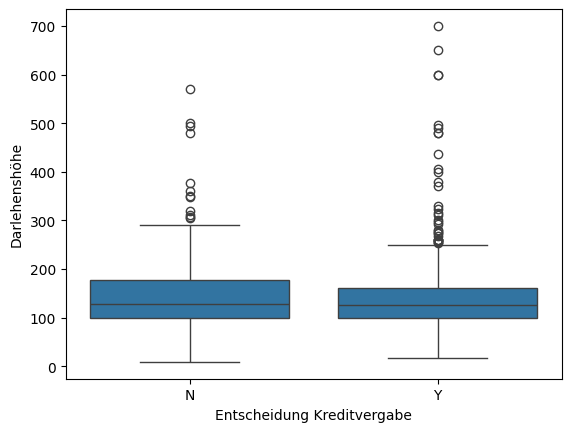

In [48]:
sns.boxplot(data=loan_df_new, y="Darlehenshöhe", x="Entscheidung Kreditvergabe")

Wir sehen an beiden Plots daß es wohl keinen Zusammenhang gibt zwischen der Höhe eines beantragten Darlehens und einer Zustimmung. Oder zumindest sehen wir den noch nicht. Aufgabe **A3** lässt sich also nicht direkt beantworten.

Deshalb schauen wir uns Aufgabe **A2 Feature Engineerung Darlehenshöhe in Klassen** an. Wir schauen ob wir durch das Bilden von 4 Klassen für Darlehen so generalisieren können daß wir mehr Infos erhalten.
Schauen wir uns zuerst die einzelnen Werte von Darlehenshöhe per sogenanntem **Histogram** an. Ein Histogram zeigt uns die einzelnen Werte auf der x-Achse und wie oft der einzelne Wert vorkommt auf der y-Achse.

Wir machen zusätzlich eine Einfärbung nach Kreditvergabe mit Hue Parameter


<Axes: xlabel='Darlehenshöhe', ylabel='Count'>

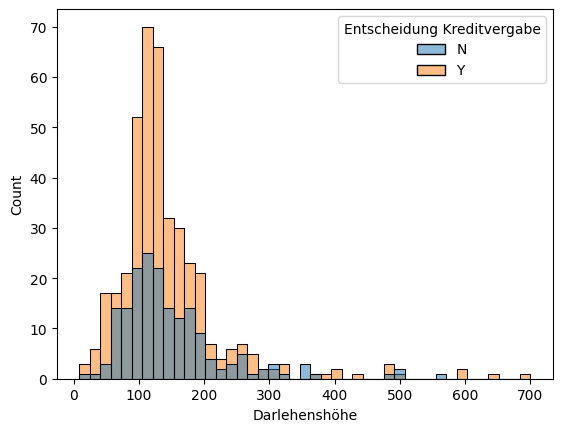

In [49]:
sns.histplot(data=loan_df_new, x="Darlehenshöhe", hue="Entscheidung Kreditvergabe")

Wir sehen deutlich daß Darlehen von ca. 50 - 200 sowie ab 600 deutlich eher genehmigt werden.

Deshalb teilen wir wie folgt in 4 Klassen ein:
* Klasse 1: 0 - 25
* Klasse 2: 25 - 300
* Klasse 3: 300 - 550
* Klasse 4: > 550


In [50]:
loan_df_new.loc[loan_df_new['Darlehenshöhe'] < 25, 'Darlehensklasse'] = 'Geringer 25'
loan_df_new.loc[(loan_df_new['Darlehenshöhe'] >= 25) & (loan_df_new['Darlehenshöhe'] <= 300), 'Darlehensklasse'] = 'Normal: 25 - 300'
loan_df_new.loc[(loan_df_new['Darlehenshöhe'] > 300) & (loan_df_new['Darlehenshöhe'] <= 550), 'Darlehensklasse'] = 'Hoch: 300 - 550'
loan_df_new.loc[loan_df_new['Darlehenshöhe'] > 550, 'Darlehensklasse'] = 'Sehr hoch: > 550'

In [51]:
loan_df_new

,Geschlecht,Verheiratet,Nutzungsintensität TikTok,Bildung,Selbstständig,Einkommen,Darlehenshöhe,Darlehensdauer (Monate),Darlehenshistorie (ja/nein),Entscheidung Kreditvergabe,Lage des Objektes,Darlehensklasse
1,Male,Yes,1,Graduate,No,4583,128,360.0,1.0,N,Rural,Normal: 25 - 300
2,Male,Yes,0,Graduate,Yes,3000,66,360.0,1.0,Y,Urban,Normal: 25 - 300
3,Male,Yes,0,Not Graduate,No,2583,120,360.0,1.0,Y,Urban,Normal: 25 - 300
4,Male,No,Unnötig,Graduate,No,6000,141,360.0,0.0,Y,Urban,Normal: 25 - 300
5,Male,Yes,2,Graduate,Yes,5417,267,360.0,1.0,Y,Urban,Normal: 25 - 300
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,NaN,Graduate,No,2900,71,360.0,1.0,Y,Rural,Normal: 25 - 300
610,Male,Yes,NaN,Graduate,No,4106,40,180.0,1.0,Y,Rural,Normal: 25 - 300
611,Male,Yes,NaN,Graduate,No,8072,253,360.0,1.0,Y,Urban,Normal: 25 - 300
612,Male,Yes,NaN,Graduate,No,7583,187,360.0,1.0,Y,Urban,Normal: 25 - 300


Wie man sieht haben wir eine neue Spalte Darlehensklasse gebaut. Damit ist Aufgabe **A2** abgeschlossen

/tmp/ipython-input-1486287464.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


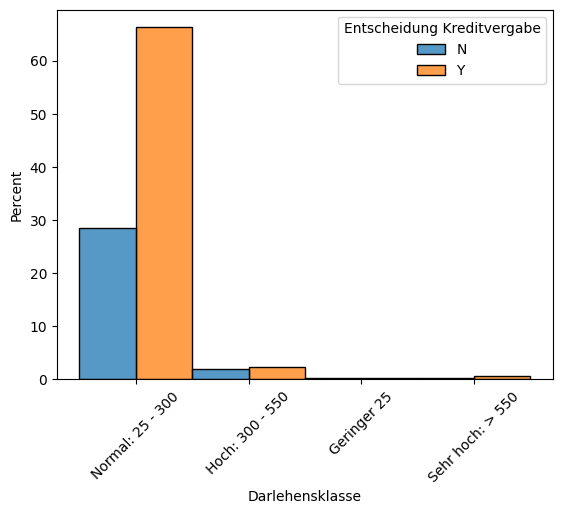

In [52]:
ax = sns.histplot(data=loan_df_new, x="Darlehensklasse", hue="Entscheidung Kreditvergabe", stat="percent", multiple="dodge") #multiple=dodge zeigt die Spalten nebeneinander
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Der Nutzen des Bauens der Darlehensklasse sieht man nun:
* bei Krediten zwischen 25 und 300 werden deutlich mehr Kredite positiv beschieden
* bei Krediten zwischen 300 - 550 ist es fast gleiche Wahrscheinlichkeit.

Damit ist Aufgabe **A3** durch Feature Engineering gelöst. Die Aufgabe **A4 Löschen der Spalte Darlehensklasse** machen wir gleich direkt im Anschluß

In [53]:
loan_df_new = loan_df_new.drop(["Darlehensklasse"], axis = 1)
loan_df_new

,Geschlecht,Verheiratet,Nutzungsintensität TikTok,Bildung,Selbstständig,Einkommen,Darlehenshöhe,Darlehensdauer (Monate),Darlehenshistorie (ja/nein),Entscheidung Kreditvergabe,Lage des Objektes
1,Male,Yes,1,Graduate,No,4583,128,360.0,1.0,N,Rural
2,Male,Yes,0,Graduate,Yes,3000,66,360.0,1.0,Y,Urban
3,Male,Yes,0,Not Graduate,No,2583,120,360.0,1.0,Y,Urban
4,Male,No,Unnötig,Graduate,No,6000,141,360.0,0.0,Y,Urban
5,Male,Yes,2,Graduate,Yes,5417,267,360.0,1.0,Y,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,NaN,Graduate,No,2900,71,360.0,1.0,Y,Rural
610,Male,Yes,NaN,Graduate,No,4106,40,180.0,1.0,Y,Rural
611,Male,Yes,NaN,Graduate,No,8072,253,360.0,1.0,Y,Urban
612,Male,Yes,NaN,Graduate,No,7583,187,360.0,1.0,Y,Urban


Schauen wir uns nun an, ob es einen Zusammenhang mit Einkommen und Entscheidung Kreditvergabe gibt, diesmal per PygWalker.

Schauen wir uns zuerst die Verteilung von Einkommen per Histogram an (Matplotlib).

<Axes: xlabel='Einkommen', ylabel='Count'>

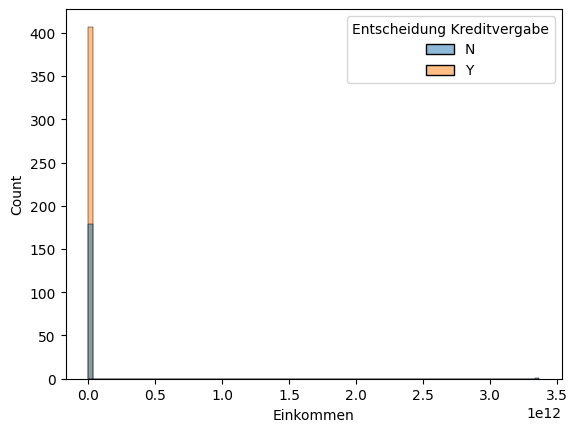

In [54]:
# bins=100 sagt es gibt maximal 100 verschiedene Werte. Ich hab diesen Wert eingeben, weil sonst Absturz aufgrund Ausreißer
sns.histplot(data=loan_df_new, x="Einkommen", hue="Entscheidung Kreditvergabe", bins=100)

Wir sehen im Bild daß wir sehr starke Ausreißer haben: die Skala geht bis zu 3.5 1e12, was eigentlich nicht sein dürfte.

Wir können auf 2 Arten mit Ausreißer umgehen:
* PygWalker = die Spalte mit dem Ausreißer in das Filter-Kriterium integrieren und dann die Ausreißer herausfiltern
* die Ausreißer aus dem Dataset löschen

Löschen wir die Ausreißer von Hand..

In [55]:
loan_df_new["Einkommen"].unique()

array([         4583,          3000,          2583,          6000,
                5417,          2333,         12841,          2500,
                3073,          1853,          1299,          4950,
                3596,          3510,          4887,          2600,
                7660,          5955, 3365000000000,          3717,
                2799,          4226,          1442,          3750,
                4166,          3167,          4692,          3500,
               12500,          1828,          3667,          3600,
                1800,          2400,          3941,          4695,
                3410,          5649,          5821,          2645,
                4000,          1928,          3086,          4230,
                4616,         11500,          2708,          2132,
                3366,          8080,          3357,          3029,
                2609,          5726,          3200,         10750,
                7100,          4300,          3208,          1

Wir sehen auch sofort den Ausreißer i.H.v. 3365000000000....wir können also nur den Wert löschen oder alle größer oder gleich dem Ausreißer.

In [56]:
loan_df_new = loan_df_new[loan_df_new["Einkommen"] < 3365000000000]
loan_df_new["Einkommen"].unique()

array([ 4583,  3000,  2583,  6000,  5417,  2333, 12841,  2500,  3073,
        1853,  1299,  4950,  3596,  3510,  4887,  2600,  7660,  5955,
        3717,  2799,  4226,  1442,  3750,  4166,  3167,  4692,  3500,
       12500,  1828,  3667,  3600,  1800,  2400,  3941,  4695,  3410,
        5649,  5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,
        2708,  2132,  3366,  8080,  3357,  3029,  2609,  5726,  3200,
       10750,  7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,
        3846,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  2484,  1977,  4188,  1759,  4288,  4843,  3816,
        3052, 11417,  7333,  3800,  2071,  5316,  2929,  3572,  5050,
       14583,  2214,  5568, 10408,  5667,  2137,  2957,  3692, 23803,
       10513,  6080, 20166,  2014,  2718,  3459,  4895,  3316, 14999,
        4200,  5042,  6950,  2698, 11757,  2330, 14866,  1538, 10000,
        4860,  6277,  2577,  9166,  2281,  3254, 39999,  9538,  2980,
        1863,  7933,

<Axes: xlabel='Einkommen', ylabel='Count'>

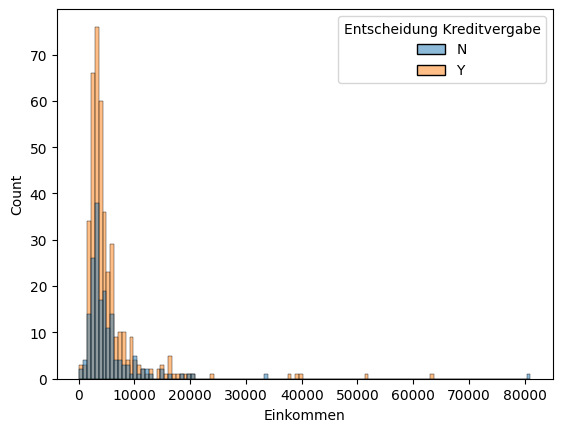

In [57]:
sns.histplot(data=loan_df_new, x="Einkommen", hue="Entscheidung Kreditvergabe")

Wir sehen hier daß:
* ab ca. 36000 Einkommen zwar wenig Kreditanfragen gibt, die aber alle genehmigt werden
* zwischen 0 und 10000 Einkommen mehrheitlich Kredite genehmigt werden

In [58]:
walker.display_chart("Zusammenhang Einkommen und Kreditvergabe") # Plot mit Einkommen gefiltert.

ValueError: chart_name: Zusammenhang Einkommen und Kreditvergabe not found.

Damit ist Aufgabe **A5 Outlier Detection** auch abgeschlossen.

Ab hier können Sie gerne alleine Auswertungen probieren.

Probieren Sie doch multivariate Auswertungen wie bspw.:
* Einkommen vs. Darlehenshöhe
* Einkommen vs. Darlehensdauer.
* Welche Auswirkungen hat Bildungsgrad?
* Oder Selbstständig? Oder Lage des Objektes??


ACHTUNG: vergessen Sie bitte nicht, in PygWalker-Initialisierungsblock PygWalker neu zu laden, falls Sie den Datensatz bearbeiten.
